# Load stanford dataset

In [31]:
import keras

import numpy as np
import scipy

from pathlib import Path

import os

import cv2

from matplotlib import pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

print("Path to dataset files:", path)

/Users/ramin/miniconda3/envs/tensorflow_312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ramin/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2


In [38]:
def get_labels(p1):
    annos = scipy.io.loadmat(Path(p1) / "cars_annos.mat")
    _, total_size = annos["annotations"].shape
    print("total sample size is ", total_size)
    labels = np.zeros((total_size, 5))
    for i in range(total_size):
        path = annos["annotations"][:, i][0][0][0].split(".")
        id = int(path[0][8:]) - 1
        for j in range(5):
            labels[id, j] = int(annos["annotations"][:, i][0][j + 1][0])
    return labels


labels = get_labels(path)

total sample size is  16185


/var/folders/wc/xkpkldpn6jl553z8rdtp0c_c0000gn/T/ipykernel_24698/2754622259.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[id, j] = int(annos["annotations"][:, i][0][j + 1][0])


image is 01125.jpg
orignal shape: 480 622
resized shape: 128 192
the label is 14.0


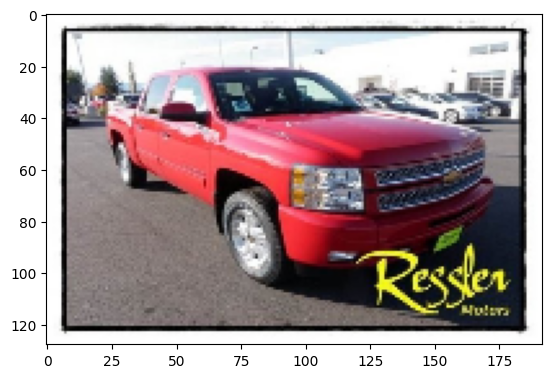

In [50]:
def peek_image(path, idx, labels, p1):
    image_names = os.listdir(p1 / (path + "/" + path))
    im = cv2.imread(p1 / (path + "/" + path + "/" + image_names[idx]))[:, :, ::-1]
    print("image is", image_names[idx])
    name = image_names[idx].split(".")
    w, h, ch = im.shape
    print("orignal shape:", w, h)
    h_resize = int(128 * 1.5)
    w_resize = 128
    im = cv2.resize(im, (h_resize, w_resize), interpolation=cv2.INTER_LINEAR)
    w, h, ch = im.shape
    print("resized shape:", w, h)
    print("the label is " + str(labels[int(name[0]) - 1, 4]))
    plt.imshow(im)


peek_image("cars_train", 4445, labels, Path(path))
# labels = []

In [51]:
labels[1125 - 1]

array([ 24.,  43., 233., 170.,  14.])

In [3]:
result = scipy.io.loadmat(Path(path) / "cars_annos.mat")

In [13]:
haha = result["class_names"].squeeze()

In [48]:
haha

array([array(['AM General Hummer SUV 2000'], dtype='<U26'),
       array(['Acura RL Sedan 2012'], dtype='<U19'),
       array(['Acura TL Sedan 2012'], dtype='<U19'),
       array(['Acura TL Type-S 2008'], dtype='<U20'),
       array(['Acura TSX Sedan 2012'], dtype='<U20'),
       array(['Acura Integra Type R 2001'], dtype='<U25'),
       array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
       array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
       array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
       array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
       array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
       array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
       array(['Audi A5 Coupe 2012'], dtype='<U18'),
       array(['Audi TTS Coupe 2012'], dtype='<U19'),
       array(['Audi R8 Coupe 2012'], dtype='<U18'),
       array(['Audi V8 Sedan 1994'], dtype='<U18'),
       array(['Audi 100 Sedan 1994'], dtype='<U19'),
       arra

In [17]:
h1 = result["annotations"][0]

In [24]:
for k in h1[0]:
    print(k)

['car_ims/000001.jpg']
[[112]]
[[7]]
[[853]]
[[717]]
[[1]]
[[0]]


In [ ]:
keras.utils.image_dataset_from_directory(path)